In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;

In [ ]:
transactions = pd.read_csv('/content/drive/MyDrive/5/ML/Lab2/transactions.csv', nrows=1000000)

In [ ]:
transactions.head(3)

customer_id tr_datetime  mcc_code  tr_type    amount term_id
0     39026145  0 10:23:26      4814     1030  -2245.92     NaN
1     39026145  1 10:19:29      6011     7010  56147.89     NaN
2     39026145  1 10:20:56      4829     2330 -56147.89     NaN

In [ ]:
gender = pd.read_csv('/content/drive/MyDrive/5/ML/Lab2/gender_train.csv')

In [ ]:
gender.head(3)

customer_id  gender
0     10928546       1
1     69348468       1
2     61009479       0

In [ ]:
codes = pd.read_csv('/content/drive/MyDrive/5/ML/Lab2/tr_mcc_codes.csv', sep=';')

In [ ]:
codes.head(3)

mcc_code                                    mcc_description
0       742                                Ветеринарные услуги
1      1711  Генеральные подрядчики по вентиляции, теплосна...
2      1731                        Подрядчики по электричеству

In [ ]:
types = pd.read_csv('/content/drive/MyDrive/5/ML/Lab2/tr_types.csv', sep=';')

In [ ]:
types.head(3)

tr_type                                     tr_description
0     3200  Плата за предоставление услуг посредством моби...
1     3210  Плата за предоставление отчета по счету карты ...
2     3800  Плата за обслуживание банковской карты (за пер...


Задания 1-4 делаются без использования merge!

## Задание 1



1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'


1

In [ ]:
sample_type = transactions['tr_type'].sample(1000)
sample_type

130146    1110
946711    7070
618552    1110
193080    2010
583973    1010
          ... 
363400    2010
192483    1010
453629    7070
526591    1110
398456    7070
Name: tr_type, Length: 1000, dtype: int64

2

In [ ]:
in_description = types[types['tr_description'].str.contains('POS|ATM')]
in_description.head(3)

tr_type                                     tr_description
7      4020  Плата за получение наличных через POS в Сбербанке
8      4021  Плата за получение наличных через POS в Сберба...
11     4040  Плата за взнос наличных через POS (в своем тер...

In [ ]:
pos_atm_type = in_description['tr_type']

In [ ]:
sample_type.isin(pos_atm_type).value_counts()

False    617
True     383
Name: tr_type, dtype: int64

## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

1

In [ ]:
transactions['tr_type'].value_counts()

1010    231117
2010    151166
7070    149006
1110    137658
1030    118975
         ...  
4061         4
4096         4
8146         3
8100         2
1510         2
Name: tr_type, Length: 72, dtype: int64

2

In [ ]:
transactions['tr_type'].value_counts().iloc[:10]

1010    231117
2010    151166
7070    149006
1110    137658
1030    118975
2370     49830
7010     28972
7030     26078
7071     15781
1100     15476
Name: tr_type, dtype: int64

## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

1

In [ ]:
plus = transactions[['customer_id','amount']][transactions['amount']>0]
plus.head(3)

customer_id     amount
1      39026145   56147.89
16     39026145  224591.58
42     39026145   22459.16

In [ ]:
group_plus = plus.groupby(['customer_id']).sum()
group_plus.head(3)

amount
customer_id             
115617         786070.52
117556        2379547.78
186730       17371260.17

In [ ]:
group_plus.sort_values(by = ['amount'], ascending=False)[:1]

amount
customer_id              
70780820     1.248115e+09

2

In [ ]:
minus = transactions[['customer_id','amount']][transactions['amount']<0]
minus.head(3)

customer_id    amount
0     39026145  -2245.92
2     39026145 -56147.89
3     39026145  -1392.47

In [ ]:
group_minus = minus.groupby(['customer_id']).sum()
group_minus.head(3)

amount
customer_id             
115617      -11764082.12
117556      -11045837.36
127946       -2265191.34

In [ ]:
group_minus.sort_values(by = ['amount'])[:1]

amount
customer_id              
70780820    -1.249952e+09

3

In [ ]:
round(abs(group_minus['amount'].min() - group_plus['amount'].max()))

2498067092

## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

1

In [ ]:
top_types = transactions['tr_type'].value_counts().iloc[:10].index
top_types

Int64Index([1010, 2010, 7070, 1110, 1030, 2370, 7010, 7030, 7071, 1100], dtype='int64')

In [ ]:
t = transactions[transactions['tr_type'].isin(top_types)]
t.head()

customer_id tr_datetime  mcc_code  tr_type    amount term_id
0     39026145  0 10:23:26      4814     1030  -2245.92     NaN
1     39026145  1 10:19:29      6011     7010  56147.89     NaN
3     39026145  1 10:39:54      5499     1010  -1392.47     NaN
4     39026145  2 15:33:42      5499     1010   -920.83     NaN
5     39026145  2 15:53:49      5541     1010 -14643.37     NaN

In [ ]:
t.groupby(['tr_type'])[['amount']].mean()

amount
tr_type               
1010     -19784.748640
1030      -5320.980222
1100     -44061.827262
1110     -32119.330371
2010    -136077.629325
2370    -205418.249032
7010     276391.789596
7030      86104.332909
7070      65569.831700
7071      66806.826623

In [ ]:
t.groupby(['tr_type'])[['amount']].median()

amount
tr_type           
1010      -7411.52
1030      -2245.92
1100     -10188.26
1110     -11207.57
2010     -44918.32
2370     -44918.32
7010     112295.79
7030      13951.52
7070      11319.42
7071       3593.47

2

Клиент из 3го задания один. Его id - 70780820

In [ ]:
c = transactions[transactions['customer_id'] == 70780820]
c.head()

customer_id tr_datetime  mcc_code  tr_type    amount term_id
371919     70780820  0 01:30:29      6010     7030   1392.47     NaN
371920     70780820  0 01:30:46      6010     7030  12262.70     NaN
371921     70780820  0 01:44:23      6010     7070  11993.19     NaN
371922     70780820  0 01:50:29      6010     7070  23222.77     NaN
371923     70780820  0 01:51:10      6010     7070  15743.87     NaN

In [ ]:
c.groupby(['tr_type'])[['amount']].mean()

amount
tr_type              
2010    -2.941056e+06
2330    -2.382398e+06
2370    -2.218505e+06
6110     1.756293e+04
7020     1.465129e+04
7021     2.850067e+04
7030     1.406196e+04
7031     1.921036e+04
7034     1.430648e+04
7040     2.153833e+04
7070     1.384821e+04
7071     1.860057e+04
7074     2.281159e+04

In [ ]:
c.groupby(['tr_type'])[['amount']].median()

amount
tr_type             
2010    -3368873.660
2330    -2245915.770
2370    -2245915.770
6110       10028.010
7020       10319.985
7021       28500.670
7030        8848.910
7031       12992.620
7034       14306.480
7040       14396.320
7070        8714.150
7071       12543.440
7074        9387.930

## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
transactions = pd.merge(transactions, gender, how='left')
transactions = pd.merge(transactions, codes, how='inner')
transactions = pd.merge(transactions, types, how='inner')
transactions.shape

(999584, 9)

In [ ]:
transactions.head()

customer_id  ...                  tr_description
0     39026145  ...  Оплата услуги. Банкоматы СБ РФ
1     39026145  ...  Оплата услуги. Банкоматы СБ РФ
2     39026145  ...  Оплата услуги. Банкоматы СБ РФ
3     39026145  ...  Оплата услуги. Банкоматы СБ РФ
4     39026145  ...  Оплата услуги. Банкоматы СБ РФ

[5 rows x 9 columns]

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

1

In [ ]:
male_minus = transactions[(transactions['gender'] == 1) & (transactions['amount'] < 0)]['amount'].mean()
male_minus

-86094.97204239463

In [ ]:
female_minus = transactions[(transactions['gender'] == 0) & (transactions['amount'] < 0)]['amount'].mean()
female_minus

-53376.91712217586

In [ ]:
abs(male_minus - female_minus)

32718.05492021877

2

In [ ]:
male_plus = transactions[(transactions['gender'] == 1) & (transactions['amount'] > 0)]['amount'].mean()
male_plus

77617.43401028725

In [ ]:
female_plus = transactions[(transactions['gender'] == 0) & (transactions['amount'] > 0)]['amount'].mean()
female_plus

140984.0050583024

In [ ]:
abs(male_plus - female_plus)

63366.57104801515

## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по полученным значениям "max_income". 
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

1

In [ ]:
male_max_income = transactions[(transactions['amount']>0)&(transactions['gender'] == 1)][['tr_type','amount']].groupby(['tr_type'],as_index = False).sum()
male10 = male_max_income.sort_values(by='amount')[:10]
male10

tr_type     amount
6      2020    2245.92
9      4110    4491.84
0      1010   35317.03
33     8100   64682.37
10     6000   79280.83
28     7041   87590.72
8      2370  113194.15
19     7015  121279.45
7      2110  179673.26
5      2010  224591.59

In [ ]:
female_max_income = transactions[(transactions['amount']>0)&(transactions['gender'] == 0)][['tr_type','amount']].groupby(['tr_type'], as_index=False).sum()
female10 = female_max_income.sort_values(by='amount')[:10]
female10

tr_type    amount
10     4051   1122.96
13     4210   2245.92
12     4110   2245.92
9      2370   2335.75
36     7075   6737.75
6      2110  22459.16
0      1010  31532.66
11     4100  40334.88
7      2210  68315.82
4      1210  83644.87

2

In [ ]:
pd.merge(female10['tr_type'],male10['tr_type'],how='inner')

tr_type
0     4110
1     2370
2     2110
3     1010

## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин. 
2. Найдите топ 10 категорий с самыми большими относительными модулями разности в тратах для разных полов (в ответе должны присутствовать описания mcc кодов).

1

In [ ]:
male_mcc = transactions[(transactions['gender'] == 1) & (transactions['amount'] < 0)][['mcc_code','amount']].groupby(['mcc_code']).sum()
male_mcc

amount
mcc_code             
742        -132277.93
1711       -206264.90
1731       -121542.67
1799      -1129257.68
2741       -221290.08
...               ...
8999     -28643346.63
9222       -988205.17
9311       -373271.22
9399      -1810820.67
9402         -4581.67

[175 rows x 1 columns]

In [ ]:
female_mcc = transactions[(transactions['gender'] == 0) & (transactions['amount'] < 0)][['mcc_code','amount']].groupby(['mcc_code']).sum()
female_mcc

amount
mcc_code             
742        -386207.68
1711       -674897.69
1799       -261626.73
2741        -20746.42
3000     -74431645.27
...               ...
8699       -521107.48
8999     -19432057.92
9222       -361143.24
9311       -406197.45
9399      -1481389.65

[174 rows x 1 columns]

2

In [ ]:
mcc = abs(male_mcc - female_mcc).sort_values(by = 'amount', ascending = False)
mcc[:10]

amount
mcc_code              
6011      3.085862e+09
4829      2.499153e+09
6010      2.208580e+08
5541      1.554326e+08
5511      7.352877e+07
5812      7.037856e+07
5977      4.241762e+07
5533      4.233808e+07
7995      4.079564e+07
5661      3.815470e+07

In [ ]:
mcc1 = mcc.reset_index()
mcc1[:10]

mcc_code        amount
0      6011  3.085862e+09
1      4829  2.499153e+09
2      6010  2.208580e+08
3      5541  1.554326e+08
4      5511  7.352877e+07
5      5812  7.037856e+07
6      5977  4.241762e+07
7      5533  4.233808e+07
8      7995  4.079564e+07
9      5661  3.815470e+07

In [ ]:
mcc2 = mcc1.merge(codes,left_on='mcc_code',right_on='mcc_code')

In [ ]:
mcc2[:10]

mcc_code        amount                                    mcc_description
0      6011  3.085862e+09  Финансовые институты — снятие наличности автом...
1      4829  2.499153e+09                                  Денежные переводы
2      6010  2.208580e+08   Финансовые институты — снятие наличности вручную
3      5541  1.554326e+08                            Станции техобслуживания
4      5511  7.352877e+07  Легковой и грузовой транспорт — продажа, серви...
5      5812  7.037856e+07             Места общественного питания, рестораны
6      5977  4.241762e+07                                 Магазины косметики
7      5533  4.233808e+07                          Автозапчасти и аксессуары
8      7995  4.079564e+07                       Транзакции по азартным играм
9      5661  3.815470e+07                                   Обувные магазины

#Доп задание

In [ ]:
transactions.head()

customer_id  ...                  tr_description
0     39026145  ...  Оплата услуги. Банкоматы СБ РФ
1     39026145  ...  Оплата услуги. Банкоматы СБ РФ
2     39026145  ...  Оплата услуги. Банкоматы СБ РФ
3     39026145  ...  Оплата услуги. Банкоматы СБ РФ
4     39026145  ...  Оплата услуги. Банкоматы СБ РФ

[5 rows x 9 columns]

 Те клиенты, которые совершили более 100 транзакций

In [ ]:
tr100 = transactions['customer_id'].value_counts()>100

In [ ]:
tr100 = tr100[tr100 == True]
tr100

70780820    True
63233186    True
44552122    True
32489134    True
54186907    True
            ... 
79078066    True
68961483    True
58023930    True
20963156    True
85592941    True
Name: customer_id, Length: 1633, dtype: bool

In [ ]:
transactions100 = transactions[transactions['customer_id'].isin(tr100.index)]

In [ ]:
print(transactions.shape)
print(transactions100.shape)

(999584, 9)
(984160, 9)


Транзакции 10 категорий из 7го задания

In [ ]:
mcc2[:10]

mcc_code        amount                                    mcc_description
0      6011  3.085862e+09  Финансовые институты — снятие наличности автом...
1      4829  2.499153e+09                                  Денежные переводы
2      6010  2.208580e+08   Финансовые институты — снятие наличности вручную
3      5541  1.554326e+08                            Станции техобслуживания
4      5511  7.352877e+07  Легковой и грузовой транспорт — продажа, серви...
5      5812  7.037856e+07             Места общественного питания, рестораны
6      5977  4.241762e+07                                 Магазины косметики
7      5533  4.233808e+07                          Автозапчасти и аксессуары
8      7995  4.079564e+07                       Транзакции по азартным играм
9      5661  3.815470e+07                                   Обувные магазины

In [ ]:
transactions100_10 = transactions100[transactions100['mcc_code'].isin(mcc2[:10]['mcc_code'])]

In [ ]:
print(transactions100.shape)
print(transactions100_10.shape)

(984160, 9)
(516855, 9)


Диаграммы для полов

In [ ]:
female_trans = transactions100_10[transactions100_10['gender'] == 0]
male_trans = transactions100_10[transactions100_10['gender'] == 1]

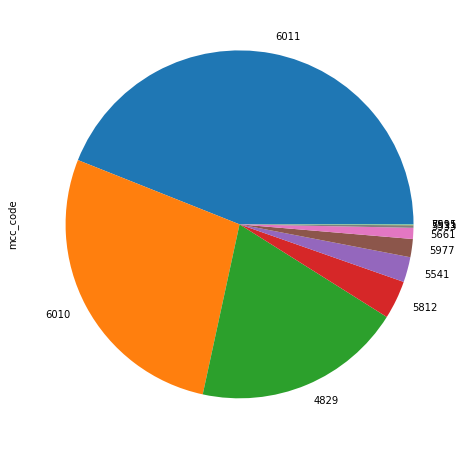

In [ ]:
female_trans['mcc_code'].value_counts().plot(kind = 'pie', figsize = (8,8))

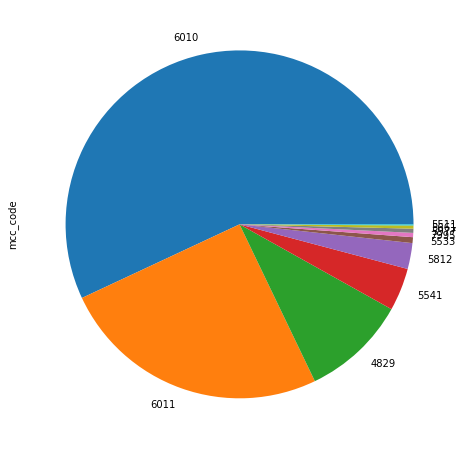

In [ ]:
male_trans['mcc_code'].value_counts().plot(kind = 'pie', figsize = (8,8))